# Pretreatment 2

Similar to Mishra and Passos (2021) but with preprocessing applied before wavelength trimming.

## References
Mishra, P., & Passos, D. (2021). A synergistic use of chemometrics and deep learning improved the predictive performance of near-infrared spectroscopy models for dry matter prediction in mango fruit. Chemometrics and Intelligent Laboratory Systems, 212. [https://doi:10.1016/j.chemolab.2021.104287]()

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from scipy.signal import savgol_filter

In [2]:
# read in prepared dataset from previous step
df = pd.read_pickle("../2_sample_selection/data/prepared/mango_dmc_and_spectra_v2.pkl")
wavelength_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in wavelength_cols]
wavelength_cols = wavelength_cols.astype(int).tolist()
df.columns = descriptive_cols + wavelength_cols
df

,partition_1,outlier_flag_1,train_partition_1,sample_order_1,origin,population,date,season,region,cultivar,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,train,0,calibration,25670,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train,0,calibration,16789,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train,0,calibration,63678,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,0,calibration,81577,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train,0,tunning,5762,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,,6265,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88449,test,0,,54886,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88450,test,0,,76820,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88451,test,0,,860,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Wavelength Range

In [3]:
initial_wavelengths = [w for w in wavelength_cols if 309 <= w <= 1149]
final_wavelengths = [w for w in wavelength_cols if 684 <= w <= 990]

## Pretreatments

In [4]:
# raw absorbance
p1 = df[initial_wavelengths]
p1

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-0.331280,-0.230921,-0.333670,-0.335732,-0.316474,-0.454959,-0.438998,-0.403578,-0.407895,-0.286772,...,-0.361612,-0.383822,-0.345500,-0.336628,-0.319799,-0.258021,-0.245601,-0.142968,-0.134122,-0.099946
1,-0.361903,-0.435489,-0.401718,-0.339383,-0.354182,-0.424313,-0.428530,-0.395883,-0.463617,-0.435997,...,-0.392400,-0.370917,-0.358545,-0.322472,-0.330231,-0.268096,-0.216323,-0.193553,-0.182665,-0.113047
2,-0.416125,-0.393934,-0.457833,-0.427786,-0.333997,-0.349580,-0.426202,-0.332990,-0.345471,-0.411378,...,-0.357548,-0.359987,-0.360750,-0.367752,-0.309994,-0.275585,-0.257435,-0.155496,-0.128074,-0.097942
3,-0.365840,-0.424752,-0.406553,-0.370280,-0.369247,-0.397355,-0.435719,-0.347667,-0.374992,-0.404723,...,-0.371852,-0.351618,-0.359620,-0.335337,-0.319432,-0.273673,-0.228374,-0.181449,-0.129967,-0.113481
4,-0.479682,-0.403551,-0.382657,-0.434473,-0.400756,-0.294791,-0.362688,-0.278762,-0.464990,-0.310895,...,-0.401768,-0.356444,-0.369370,-0.312450,-0.327417,-0.258553,-0.229518,-0.181592,-0.153142,-0.115271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-0.249538,0.014473,0.213377,0.314215,0.300654,0.160862,-0.158992,-0.061177,0.108025,-0.037867,...,0.213113,0.239179,0.270558,0.309281,0.346996,0.390992,0.427297,0.000000,0.000000,0.000000
88449,0.262905,0.097746,1.441031,-0.076973,0.056921,-0.462767,-0.689058,-0.424293,-0.284243,-0.504293,...,0.201033,0.221015,0.260635,0.303508,0.341502,0.384739,0.416927,0.000000,0.000000,0.000000
88450,0.140915,-0.147302,0.049367,0.320546,0.050564,0.000000,-0.051989,-0.179539,-0.652067,-1.042746,...,0.243450,0.274413,0.311304,0.364267,0.425517,0.474339,0.523918,0.000000,0.000000,0.000000
88451,0.093143,0.505401,0.236635,0.119781,0.824079,0.357347,0.996855,0.627651,-0.114433,0.005879,...,0.246126,0.264123,0.293565,0.341017,0.377298,0.410651,0.439393,0.000000,0.000000,0.000000


In [5]:
# standard normal variate (SNV)
p2 = df[initial_wavelengths].apply(lambda x: (x - x.mean()) / x.std())
p2

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-1.888136,-1.227638,-1.931621,-1.946656,-1.783984,-2.759727,-2.570388,-2.273021,-2.256335,-1.418154,...,-0.799597,-0.976466,-0.934226,-0.981475,-1.025151,-0.953568,-1.066540,-0.766737,-0.857961,-0.742333
1,-2.089738,-2.586581,-2.391904,-1.971659,-2.041194,-2.546693,-2.499119,-2.221456,-2.625388,-2.392117,...,-0.937819,-0.927847,-0.978524,-0.937145,-1.056907,-0.983353,-0.962980,-0.980435,-1.105177,-0.808353
2,-2.446686,-2.310527,-2.771469,-2.577192,-1.903507,-2.027181,-2.483274,-1.799994,-1.842892,-2.231433,...,-0.781349,-0.886670,-0.986009,-1.078944,-0.995304,-1.005493,-1.108398,-0.819664,-0.827162,-0.732233
3,-2.115655,-2.515251,-2.424608,-2.183295,-2.143954,-2.359292,-2.548068,-1.898352,-2.038415,-2.187994,...,-0.845569,-0.855140,-0.982174,-0.977433,-1.024034,-0.999840,-1.005606,-0.929301,-0.836801,-0.810540
4,-2.865089,-2.374414,-2.262973,-2.622999,-2.358881,-1.646309,-2.050853,-1.436601,-2.634481,-1.575602,...,-0.979872,-0.873323,-1.015282,-0.905758,-1.048341,-0.955139,-1.009651,-0.929905,-0.954825,-0.819562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-1.350022,0.402516,1.768663,2.505283,2.425514,1.521191,-0.664054,0.021481,1.160651,0.206402,...,1.780597,1.370584,1.157739,1.041288,1.004620,0.965110,1.313602,-0.162775,-0.174920,-0.238678
88449,2.023460,0.955692,10.072632,-0.174235,0.762989,-2.814009,-4.272852,-2.411837,-1.437373,-2.837874,...,1.726367,1.302156,1.124045,1.023210,0.987897,0.946626,1.276922,-0.162775,-0.174920,-0.238678
88450,1.220383,-0.672155,0.659284,2.548646,0.719626,0.402949,0.064449,-0.771691,-3.873506,-6.352246,...,1.916796,1.503325,1.296102,1.213486,1.243643,1.211510,1.655367,-0.162775,-0.174920,-0.238678
88451,0.905892,3.663742,1.925983,1.173467,5.995858,2.887071,7.205189,4.637469,-0.312713,0.491922,...,1.928808,1.464559,1.235865,1.140676,1.096861,1.023229,1.356388,-0.162775,-0.174920,-0.238678


In [6]:
# Savitzky-Golay smoothing, 1st deriv
p3 = df[initial_wavelengths].apply(
    lambda row: savgol_filter(
        x=row,
        window_length=13,
        polyorder=2,
        deriv=1
    ),
    axis=1,
    result_type="expand"
)
p3.columns = initial_wavelengths
p3

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-0.040310,-0.034226,-0.028143,-0.022059,-0.015976,-0.009892,-0.003808,-0.005724,-0.005065,-0.002392,...,0.015105,0.019322,0.022655,0.025978,0.030813,0.035648,0.040483,0.045318,0.050153,0.054988
1,-0.010836,-0.009324,-0.007813,-0.006301,-0.004789,-0.003277,-0.001765,-0.002301,-0.002950,-0.002086,...,0.016186,0.019350,0.021912,0.025091,0.028470,0.031849,0.035228,0.038607,0.041986,0.045365
2,0.014310,0.012500,0.010691,0.008882,0.007072,0.005263,0.003454,0.002374,0.003344,0.001809,...,0.014554,0.018897,0.022367,0.025530,0.030956,0.036382,0.041808,0.047234,0.052660,0.058086
3,0.002527,0.002063,0.001599,0.001134,0.000670,0.000206,-0.000259,-0.001146,-0.002573,-0.003990,...,0.015603,0.019070,0.023150,0.026550,0.030311,0.034072,0.037833,0.041594,0.045355,0.049116
4,0.044224,0.036810,0.029396,0.021982,0.014568,0.007154,-0.000261,-0.003549,-0.005248,-0.007443,...,0.015919,0.019481,0.022228,0.025316,0.029284,0.033252,0.037220,0.041189,0.045157,0.049125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,0.097810,0.076058,0.054307,0.032556,0.010804,-0.010947,-0.032699,-0.043363,-0.053474,-0.055244,...,0.025242,0.012854,0.001583,-0.008349,-0.024425,-0.040500,-0.056576,-0.072652,-0.088728,-0.104803
88449,-0.153570,-0.148526,-0.143482,-0.138437,-0.133393,-0.128349,-0.123305,-0.097448,-0.081625,-0.017109,...,0.025573,0.013664,0.002368,-0.007867,-0.023559,-0.039251,-0.054943,-0.070634,-0.086326,-0.102018
88450,-0.081690,-0.077997,-0.074305,-0.070613,-0.066920,-0.063228,-0.059536,-0.049302,-0.064552,-0.062877,...,0.031906,0.017011,0.003555,-0.008593,-0.028096,-0.047600,-0.067103,-0.086607,-0.106110,-0.125614
88451,0.121296,0.096225,0.071155,0.046084,0.021014,-0.004057,-0.029128,-0.044572,-0.043004,-0.055218,...,0.025030,0.011780,-0.000579,-0.011434,-0.028189,-0.044945,-0.061700,-0.078456,-0.095211,-0.111967


In [7]:
# Savitzky-Golay smoothing, 2nd deriv
p4 = df[initial_wavelengths].apply(
    lambda row: savgol_filter(
        x=row,
        window_length=13,
        polyorder=2,
        deriv=2
    ),
    axis=1,
    result_type="expand"
)
p4.columns = initial_wavelengths
p4

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,0.006084,0.006084,0.006084,0.006084,0.006084,0.006084,0.006084,0.004801,-0.000653,-0.000013,...,0.001962,0.004105,0.004777,0.004835,0.004835,0.004835,0.004835,0.004835,0.004835,0.004835
1,0.001512,0.001512,0.001512,0.001512,0.001512,0.001512,0.001512,-0.000504,0.001599,0.003092,...,0.003357,0.003647,0.002936,0.003379,0.003379,0.003379,0.003379,0.003379,0.003379,0.003379
2,-0.001809,-0.001809,-0.001809,-0.001809,-0.001809,-0.001809,-0.001809,-0.002064,-0.001771,0.000595,...,0.001492,0.003364,0.004737,0.005426,0.005426,0.005426,0.005426,0.005426,0.005426,0.005426
3,-0.000464,-0.000464,-0.000464,-0.000464,-0.000464,-0.000464,-0.000464,-0.002463,-0.001304,-0.000642,...,0.002859,0.003665,0.004312,0.003761,0.003761,0.003761,0.003761,0.003761,0.003761,0.003761
4,-0.007414,-0.007414,-0.007414,-0.007414,-0.007414,-0.007414,-0.007414,-0.004381,-0.003317,-0.003321,...,0.002971,0.003516,0.003989,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-0.021751,-0.021751,-0.021751,-0.021751,-0.021751,-0.021751,-0.021751,-0.003427,0.003893,0.006681,...,0.003680,-0.006701,-0.013099,-0.016076,-0.016076,-0.016076,-0.016076,-0.016076,-0.016076,-0.016076
88449,0.005044,0.005044,0.005044,0.005044,0.005044,0.005044,0.005044,0.036833,0.061148,0.029387,...,0.003577,-0.006883,-0.013095,-0.015692,-0.015692,-0.015692,-0.015692,-0.015692,-0.015692,-0.015692
88450,0.003692,0.003692,0.003692,0.003692,0.003692,0.003692,0.003692,0.011924,0.014986,0.020019,...,0.005015,-0.007701,-0.015762,-0.019504,-0.019504,-0.019504,-0.019504,-0.019504,-0.019504,-0.019504
88451,-0.025071,-0.025071,-0.025071,-0.025071,-0.025071,-0.025071,-0.025071,-0.012732,-0.008597,0.000103,...,0.002865,-0.007986,-0.014235,-0.016755,-0.016755,-0.016755,-0.016755,-0.016755,-0.016755,-0.016755


In [8]:
# SNV + Savitzky-Golay smoothing (1st deriv)
p5 = p2.apply(
    lambda row: savgol_filter(
        x=row,
        window_length=13,
        polyorder=2,
        deriv=1
    ),
    axis=1,
    result_type="expand"
)
p5.columns = initial_wavelengths
p5

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-0.279166,-0.232226,-0.185285,-0.138344,-0.091404,-0.044463,0.002478,0.001026,0.025188,0.060482,...,-0.038146,-0.028896,-0.022024,-0.010239,0.006035,0.022310,0.038585,0.054859,0.071134,0.087408
1,-0.088315,-0.070501,-0.052688,-0.034875,-0.017061,0.000752,0.018566,0.026541,0.036413,0.061453,...,-0.033523,-0.027764,-0.024780,-0.014193,-0.005481,0.003231,0.011943,0.020655,0.029368,0.038080
2,0.081449,0.076702,0.071954,0.067207,0.062460,0.057712,0.052965,0.055374,0.074009,0.080345,...,-0.038245,-0.028236,-0.021598,-0.011493,0.006768,0.025029,0.043290,0.061551,0.079812,0.098073
3,0.000070,0.004869,0.009669,0.014469,0.019269,0.024069,0.028869,0.034091,0.039498,0.052872,...,-0.035901,-0.029015,-0.018347,-0.006227,0.004448,0.015124,0.025800,0.036476,0.047152,0.057828
4,0.274337,0.233669,0.193002,0.152334,0.111666,0.070999,0.030331,0.017925,0.022082,0.033262,...,-0.035119,-0.027411,-0.023845,-0.013366,-0.001160,0.011047,0.023253,0.035460,0.047666,0.059873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,0.658432,0.516169,0.373907,0.231645,0.089382,-0.052880,-0.195142,-0.267972,-0.323753,-0.312737,...,-0.172004,-0.195011,-0.207825,-0.212767,-0.220846,-0.228925,-0.237004,-0.245082,-0.253161,-0.261240
88449,-1.068975,-1.020903,-0.972832,-0.924760,-0.876688,-0.828616,-0.780544,-0.614887,-0.507506,-0.055045,...,-0.167727,-0.188846,-0.202746,-0.210183,-0.217405,-0.224627,-0.231848,-0.239070,-0.246292,-0.253514
88450,-0.527450,-0.501170,-0.474890,-0.448610,-0.422330,-0.396050,-0.369770,-0.299338,-0.369021,-0.323916,...,-0.155505,-0.186917,-0.206330,-0.218230,-0.236059,-0.253889,-0.271718,-0.289547,-0.307377,-0.325206
88451,0.868963,0.693830,0.518698,0.343566,0.168434,-0.006698,-0.181830,-0.291242,-0.290574,-0.368786,...,-0.179602,-0.204691,-0.221160,-0.228976,-0.237145,-0.245313,-0.253482,-0.261651,-0.269820,-0.277989


In [9]:
# SNV + Savitzky-Golay smoothing (2nd deriv)
p6 = p2.apply(
    lambda row: savgol_filter(
        x=row,
        window_length=13,
        polyorder=2,
        deriv=2
    ),
    axis=1,
    result_type="expand"
)
p6.columns = initial_wavelengths
p6

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,0.046941,0.046941,0.046941,0.046941,0.046941,0.046941,0.046941,0.040935,0.011609,0.019490,...,-0.000045,0.009120,0.012776,0.016275,0.016275,0.016275,0.016275,0.016275,0.016275,0.016275
1,0.017813,0.017813,0.017813,0.017813,0.017813,0.017813,0.017813,0.006443,0.023020,0.038992,...,0.006479,0.007146,0.003257,0.008712,0.008712,0.008712,0.008712,0.008712,0.008712,0.008712
2,-0.004747,-0.004747,-0.004747,-0.004747,-0.004747,-0.004747,-0.004747,-0.005851,-0.002167,0.019012,...,-0.001872,0.005095,0.011829,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261
3,0.004800,0.004800,0.004800,0.004800,0.004800,0.004800,0.004800,-0.006835,0.003940,0.016592,...,0.004785,0.007669,0.010690,0.010676,0.010676,0.010676,0.010676,0.010676,0.010676,0.010676
4,-0.040668,-0.040668,-0.040668,-0.040668,-0.040668,-0.040668,-0.040668,-0.020538,-0.009774,0.000411,...,0.004747,0.006400,0.009108,0.012207,0.012207,0.012207,0.012207,0.012207,0.012207,0.012207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-0.142262,-0.142262,-0.142262,-0.142262,-0.142262,-0.142262,-0.142262,-0.022007,0.035892,0.067528,...,0.020574,0.001990,-0.005938,-0.008079,-0.008079,-0.008079,-0.008079,-0.008079,-0.008079,-0.008079
88449,0.048072,0.048072,0.048072,0.048072,0.048072,0.048072,0.048072,0.252065,0.413394,0.206063,...,0.019650,-0.000032,-0.007155,-0.007222,-0.007222,-0.007222,-0.007222,-0.007222,-0.007222,-0.007222
88450,0.026280,0.026280,0.026280,0.026280,0.026280,0.026280,0.026280,0.082513,0.123520,0.172280,...,0.024459,-0.000898,-0.013855,-0.017829,-0.017829,-0.017829,-0.017829,-0.017829,-0.017829,-0.017829
88451,-0.175132,-0.175132,-0.175132,-0.175132,-0.175132,-0.175132,-0.175132,-0.092946,-0.065367,0.001666,...,0.017641,-0.002205,-0.008578,-0.008169,-0.008169,-0.008169,-0.008169,-0.008169,-0.008169,-0.008169


### Visualise Pretreatments

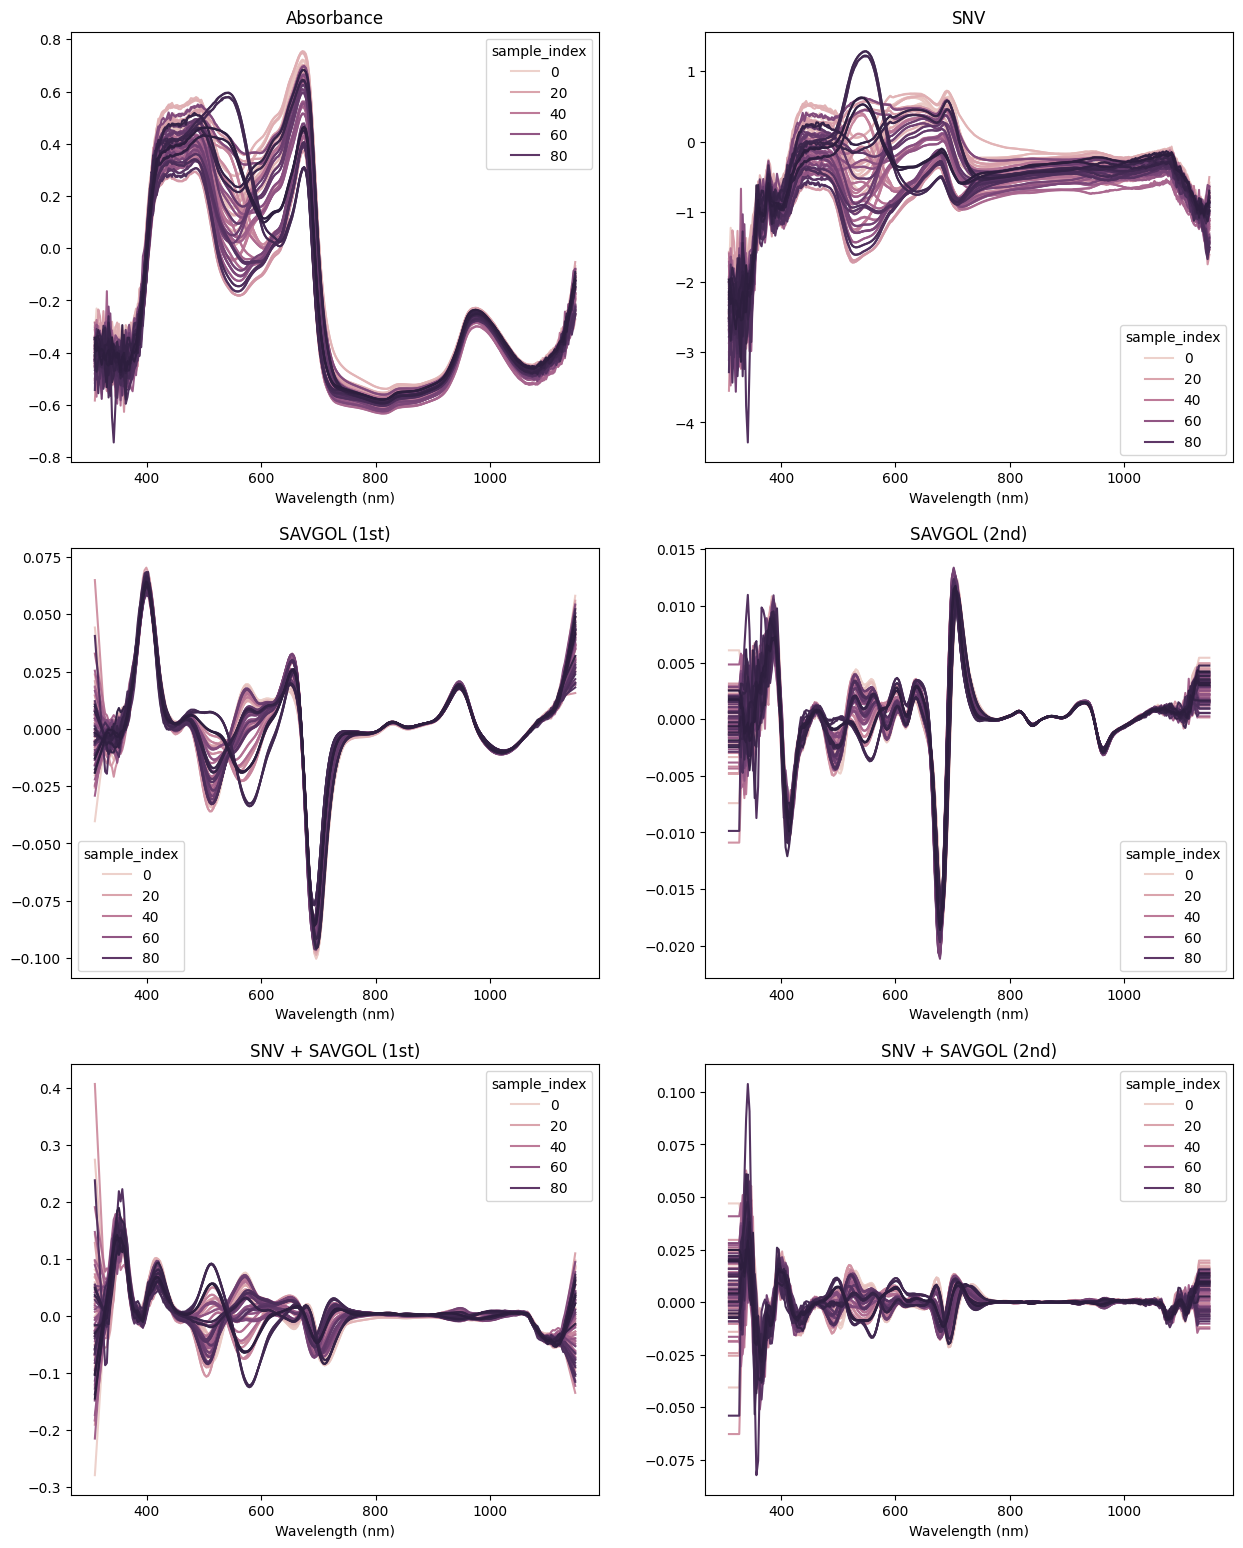

In [10]:
first_n_samples = 100
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 19))

def plot_data(data, ax, title, xlabel):
    plot = sns.lineplot(
        data=(data[:first_n_samples]
              .reset_index(names="sample_index")
              .melt(id_vars="sample_index", var_name="wavelength", value_name="absorbance")),
        x="wavelength", y="absorbance", hue="sample_index", ax=ax
    )
    plot.set(title=title, xlabel=xlabel, ylabel=None)
    plot.xaxis.set_major_locator(MaxNLocator(nbins=6))

# Absorbance
plot_data(p1, axs[0, 0], "Absorbance", "Wavelength (nm)")

# Standard Normal Variate (SNV)
plot_data(p2, axs[0, 1], "SNV", "Wavelength (nm)")

# Savitzky-Golay smoothing, 1st deriv
plot_data(p3, axs[1, 0], "SAVGOL (1st)", "Wavelength (nm)")

# Savitzky-Golay smoothing, 2nd deriv
plot_data(p4, axs[1, 1], "SAVGOL (2nd)", "Wavelength (nm)")

# SNV + Savitzky-Golay smoothing (1st deriv)
plot_data(p5, axs[2, 0], "SNV + SAVGOL (1st)", "Wavelength (nm)")

# SNV + Savitzky-Golay smoothing (2nd deriv)
plot_data(p6, axs[2, 1], "SNV + SAVGOL (2nd)", "Wavelength (nm)")

plt.show()

## Augmentation

In [11]:
df_augmented = pd.concat(
    objs=[
        df[descriptive_cols],
        p1[final_wavelengths].add_suffix("_abs"),
        p2[final_wavelengths].add_suffix("_snv"),
        p3[final_wavelengths].add_suffix("_savgol_d1"),
        p4[final_wavelengths].add_suffix("_savgol_d2"),
        p5[final_wavelengths].add_suffix("_snv_savgol_d1"),
        p6[final_wavelengths].add_suffix("_snv_savgol_d2"),
    ],
    axis=1
)
df_augmented

,partition_1,outlier_flag_1,train_partition_1,sample_order_1,origin,population,date,season,region,cultivar,...,963_snv_savgol_d2,966_snv_savgol_d2,969_snv_savgol_d2,972_snv_savgol_d2,975_snv_savgol_d2,978_snv_savgol_d2,981_snv_savgol_d2,984_snv_savgol_d2,987_snv_savgol_d2,990_snv_savgol_d2
0,train,0,calibration,25670,published,100100,2015-09-27,2015,NT,caly,...,-0.000131,-0.000092,-0.000012,-0.000182,-0.000253,-0.000144,0.000019,0.000249,0.000230,6.533417e-04
1,train,0,calibration,16789,published,100100,2015-09-27,2015,NT,caly,...,-0.000111,-0.000026,-0.000093,0.000019,0.000164,0.000221,0.000233,0.000077,-0.000036,-1.931117e-04
2,train,0,calibration,63678,published,100100,2015-09-27,2015,NT,caly,...,-0.002515,-0.002401,-0.002044,-0.001425,-0.000918,-0.000668,-0.000465,-0.000262,0.000032,2.624132e-04
3,train,0,calibration,81577,published,100100,2015-09-27,2015,NT,caly,...,-0.002461,-0.002524,-0.002224,-0.001803,-0.001379,-0.000860,-0.000336,-0.000029,0.000145,4.054936e-04
4,train,0,tunning,5762,published,100100,2015-09-27,2015,NT,caly,...,0.000350,0.000842,0.001242,0.001021,0.001024,0.001171,0.000986,0.000671,0.000662,8.433515e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,,6265,marcelo,200800,NaT,2021,QLD,keitt,...,-0.000465,-0.000311,-0.000081,0.000056,0.000095,0.000244,0.000222,0.000151,0.000045,-5.079564e-05
88449,test,0,,54886,marcelo,200800,NaT,2021,QLD,keitt,...,-0.000052,-0.000022,-0.000026,0.000122,0.000356,0.000442,0.000368,0.000315,0.000160,1.862943e-04
88450,test,0,,76820,marcelo,200800,NaT,2021,QLD,keitt,...,-0.000103,-0.000187,-0.000218,-0.000149,-0.000005,-0.000093,-0.000215,-0.000435,-0.000591,-5.187899e-04
88451,test,0,,860,marcelo,200800,NaT,2021,QLD,keitt,...,-0.002685,-0.002903,-0.002824,-0.002407,-0.001845,-0.001553,-0.001251,-0.001117,-0.001101,-1.085356e-03


## Output data

In [12]:
# output
df_augmented.to_pickle("data/interim/pretreatment_2.pkl")